In [1]:
import os
import pdb
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
search_word = '[14000/14616]'
# Train < Adapter > [e05][14000/14616] Loss 5.6505(5.7592) Acc 21.8750(19.8635)

# log_file = '../output_logs/baseline-2022-07-11T22-51-25Z-train_adapter.log'  # the one has no wandb exp

# log_file = '../output_logs/baseline-2022-07-13T05-28-35Z-train_adapter.log' # sv new lr
log_file = '../output_logs/baseline-2022-07-13T05-32-16Z-train_adapter.log'  # sv old lr
log_file = '../output_logs/baseline-2022-07-15T05-20-20Z-train_adapter.log'  # sv old lr cont

# log_file = '../output_logs/baseline-2022-07-15T05-57-05Z-train_adapter.log' # SV 0.2 w/bg 0.5
# log_file = '../output_logs/baseline-2022-07-15T05-38-30Z-train_adapter.log' # SN 0.2 w/bg 0.5
# log_file = '../output_logs/baseline-2022-07-15T05-41-31Z-train_adapter.log' # SN 0.2 w/bg 0.7

# log_file = '../output_logs/baseline-2022-07-15T05-45-33Z-train_adapter.log' # KL-top3
# log_file = '../output_logs/baseline-2022-07-15T06-05-48Z-train_adapter.log' # Regression

# log_file = '../output_logs/baseline-2022-07-15T05-28-45Z-train_adapter.log'  # SV, 0.2 baseline
# log_file = '../output_logs/baseline-2022-07-15T17-42-24Z-train_adapter.log'  # SV 0.2 w/bg 0.5 CONT

log_file = '../output_logs/baseline-2022-07-21T04-34-57Z-train_adapter.log'


In [10]:
best_acc = 0
best_acc_epoch = 0
acc_list = []
loss_list = []
with open(log_file, 'r') as f:
    lines = f.readlines()
    
for line in lines:
    if search_word in line:
        line_elements = line.split()
        
        loss_idx = line_elements.index('Loss') + 1
        acc_idx =  line_elements.index('Acc') + 1
        
        for i in range(len(line_elements)):
            if search_word in line_elements[i]:
                epoch = line_elements[i].split(search_word)[0].split('[e')[1].split(']')[0]
                break
        
        acc = float(line_elements[acc_idx].split('(')[1].split(')')[0])
        loss = float(line_elements[loss_idx].split('(')[1].split(')')[0])
        acc_list.append(acc)
        loss_list.append(loss)
        
        if acc > best_acc:
            best_acc = acc
            best_acc_epoch = epoch
                
    # break

print('Best acc: {}'.format(best_acc))
print('Best acc epoch: {}'.format(best_acc_epoch))
print('In total, {} epochs'.format(len(acc_list)))

Best acc: 19.3269
Best acc epoch: 52
In total, 118 epochs


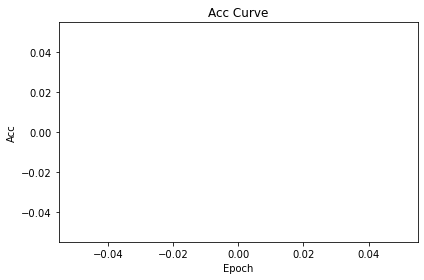

In [8]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.title('Acc Curve')
plt.plot(acc_list)
plt.tight_layout()
plt.savefig('{}_acc_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [147]:
acc_list

[15.6933,
 29.2715,
 35.4774,
 39.8325,
 42.991,
 45.5797,
 47.661,
 49.516,
 51.139,
 52.6302,
 53.9506,
 55.2434,
 56.4193,
 57.5222,
 58.5636,
 59.5917,
 60.5381,
 61.4872,
 62.3504,
 63.1809,
 64.0482,
 64.8689,
 65.6607,
 66.4283,
 67.1678,
 67.9055,
 68.6304,
 69.3335,
 70.0082,
 70.7067,
 71.3701,
 72.0188,
 72.6895,
 73.3268,
 73.9356,
 74.5357,
 75.152,
 75.7605,
 76.3496]

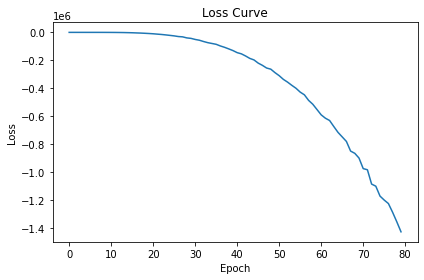

In [215]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.plot(loss_list)
plt.tight_layout()
plt.savefig('{}_loss_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()

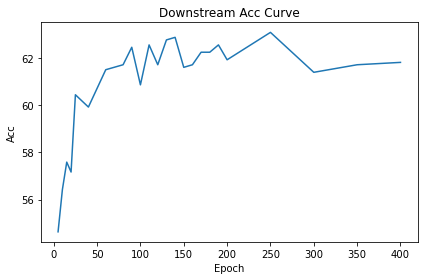

In [227]:
line2parse = 'epoch 250 (63.08), epoch 140 (62.87), epoch 130 (62.76), epoch 110 (62.55), epoch 190 (62.55), epoch 90 (62.45), epoch 170 (62.24), epoch 180 (62.24), epoch 200 (61.92), epoch 400 (61.81), epoch 120 (61.71), epoch 350 (61.71), epoch 80 (61.71), epoch 160 (61.71), epoch 150 (61.60), epoch 60 (61.50), epoch 300 (61.39), epoch 100 (60.86), epoch 25 (60.44), epoch 40 (59.92), epoch 15 (57.59), epoch 20 (57.17), epoch 10 (56.43), epoch 5 (54.64)'
epoch_results = dict()
for epoch_result in line2parse.split(','):
    epoch_res = float(epoch_result.split('(')[1].split(')')[0])
    epoch_num = int(epoch_result.split('(')[0].split()[1])
    epoch_results[epoch_num] = epoch_res
x_line = sorted(list(epoch_results.keys()))
y_line = [epoch_results[x] for x in x_line]

fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.title('Downstream Acc Curve')
plt.plot(x_line, y_line)
plt.tight_layout()
plt.savefig('{}_acc_curve.png'.format('downstream'), bbox_inches='tight', transparent=True)
plt.show()
plt.close()